In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import shapiro

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.float_format', '{:.2f}'.format)  # Cambia 2 a la cantidad de decimales que desees mostrar

df = pd.read_csv('data_w.csv')
tabla = pd.DataFrame(df)
tabla.head()

,Año,Poblacion,Extension,Densidad_C,Pobl_Urbana,Porcentaje_Urbano,Tierras_Cultivables,Area_Selvatica,Refugiados_P_Origen,Porcentaje_Refugiados,Emisiones_N2O,Emisiones_CO2,Temperatura_Media,Cambio_Temperatura,Precipitaciones,Porcent_Hielo,Radiacion_solar_w/m2
0,1960,3021222521.00,131091936.64,23.05,1017560391.00,33.68,1241680080.30,0.00,150000.00,0.00,0.00,0.00,18.08,0.00,0.01,0.05,0.05
1,1961,3061799463.00,131091936.64,23.36,1046103392.00,34.17,1241680080.30,0.00,302000.00,0.01,0.00,0.00,18.22,0.00,0.01,-0.09,-0.09
2,1962,3115847136.00,131091936.64,23.77,1077961218.00,34.60,1242475597.30,0.00,322000.00,0.01,0.00,0.00,18.31,0.00,-0.01,-0.11,-0.11
3,1963,3182036754.00,131091936.64,24.27,1112782604.00,34.97,1249803780.40,0.00,353000.00,0.01,0.00,0.00,18.36,0.00,0.02,-0.02,-0.02
4,1964,3248650390.00,131091936.64,24.78,1148487944.00,35.35,1252095628.90,0.00,1700690.00,0.05,0.00,0.00,17.99,0.00,-0.01,0.05,0.05


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el DataFrame
tabla = pd.DataFrame({
    'Año': tabla_reducida['Año'],
    'Poblacion': tabla_reducida['Poblacion'],
    'Pobl_Urbana': tabla_reducida['Pobl_Urbana'],
    'Tierras_Cultivables': tabla_reducida['Tierras_Cultivables'],
    'Area_Selvatica': tabla_reducida['Area_Selvatica']
})

# Crear un gráfico de barras para las cuatro variables en el mismo gráfico
plt.figure(figsize=(10, 6))
plt.bar(tabla['Año'] - 0.3, tabla['Poblacion'], width=0.15, color='blue', label='Población')
plt.bar(tabla['Año'] - 0.15, tabla['Pobl_Urbana'], width=0.15, color='green', label='Población Urbana')
plt.bar(tabla['Año'] + 0.15, tabla['Tierras_Cultivables'], width=0.15, color='orange', label='Tierras Cultivables')
plt.bar(tabla['Año'] + 0.3, tabla['Area_Selvatica'], width=0.15, color='red', label='Área Selvática')

plt.xlabel('Año')
plt.ylabel('Valores')
plt.title('Variables con alta correlación')
plt.legend()

# Mostrar el gráfico
plt.show()


NameError: name 'tabla_reducida' is not defined

In [3]:
# Existen algunas variables con datos desde hace menos años. Hacemos una proyección de ellos hacia el pasado.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


# Datos históricos de población
hist_selva = tabla.iloc[30:][['Año', 'Area_Selvatica']]
hist_N2O = tabla.iloc[30:][['Año', 'Emisiones_N2O']]
hist_CO2 = tabla.iloc[30:45][['Año', 'Emisiones_CO2']]
hist_camb_temp = tabla.iloc[10:][['Año', 'Cambio_Temperatura']]

# Modelo de regresión lineal Ridge
alpha = 1.0  # Valor ajustable

model_selva = Ridge(alpha=alpha)
model_N2O = Ridge(alpha=alpha)
model_CO2 = Ridge(alpha=alpha)
model_camb_temp = Ridge(alpha=alpha)

# Ajusta el modelo a los datos históricos
X = hist_selva[['Año']]
y = hist_selva['Area_Selvatica']
model_selva.fit(X, y)

V = hist_N2O[['Año']]
w = hist_N2O['Emisiones_N2O']
model_N2O.fit(V, w)

S = hist_CO2[['Año']]
t = hist_CO2['Emisiones_CO2']
model_CO2.fit(S, t)

P = hist_camb_temp[['Año']]
q = hist_camb_temp['Cambio_Temperatura']
model_camb_temp.fit(P, q)

# Proyecta las variables al pasado
pas_años_selva = np.arange(1960, 1991)
selva_pas = model_selva.predict(pas_años_selva.reshape(-1, 1))

pas_años_N2O = np.arange(1960, 1991)
N2O_pas = model_N2O.predict(pas_años_N2O.reshape(-1, 1))

pas_años_CO2 = np.arange(1960, 1991)
CO2_pas = model_CO2.predict(pas_años_CO2.reshape(-1, 1))

pas_años_camb_temp = np.arange(1960, 1991)
camb_temp_pas = model_camb_temp.predict(pas_años_camb_temp.reshape(-1, 1))


# Crea un DataFrame para los datos proyectados
datos_proyectados_pas = pd.DataFrame({'Año': pas_años_selva, 'Area_Selvatica': selva_pas,
'Año': pas_años_N2O, 'Emisiones_N2O': N2O_pas,
'Año': pas_años_CO2, 'Emisiones_CO2': CO2_pas,
'Año': pas_años_camb_temp, 'Cambio_Temperatura': camb_temp_pas})

datos_proyectados_pas.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


,Año,Area_Selvatica,Emisiones_N2O,Emisiones_CO2,Cambio_Temperatura
0,1960,43919617.62,102071399.64,706.62,-0.46
1,1961,43860097.71,102265928.73,709.25,-0.43
2,1962,43800577.81,102460457.81,711.87,-0.40
3,1963,43741057.90,102654986.90,714.50,-0.37
4,1964,43681538.00,102849515.98,717.12,-0.34


In [4]:
# Rellena la tabla original con los datos proyectados hacia el pasado.

tabla.loc[0:29,'Area_Selvatica'] = datos_proyectados_pas.loc[0:29,'Area_Selvatica']
tabla.loc[0:29,'Emisiones_N2O'] = datos_proyectados_pas.loc[0:29,'Emisiones_N2O']
tabla.loc[0:29,'Emisiones_CO2'] = datos_proyectados_pas.loc[0:29,'Emisiones_CO2']
tabla.loc[0:9,'Cambio_Temperatura'] = datos_proyectados_pas.loc[0:9,'Cambio_Temperatura']


In [5]:
tabla.head()

,Año,Poblacion,Extension,Densidad_C,Pobl_Urbana,Porcentaje_Urbano,Tierras_Cultivables,Area_Selvatica,Refugiados_P_Origen,Porcentaje_Refugiados,Emisiones_N2O,Emisiones_CO2,Temperatura_Media,Cambio_Temperatura,Precipitaciones,Porcent_Hielo,Radiacion_solar_w/m2
0,1960,3021222521.00,131091936.64,23.05,1017560391.00,33.68,1241680080.30,43919617.62,150000.00,0.00,102071399.64,706.62,18.08,-0.46,0.01,0.05,0.05
1,1961,3061799463.00,131091936.64,23.36,1046103392.00,34.17,1241680080.30,43860097.71,302000.00,0.01,102265928.73,709.25,18.22,-0.43,0.01,-0.09,-0.09
2,1962,3115847136.00,131091936.64,23.77,1077961218.00,34.60,1242475597.30,43800577.81,322000.00,0.01,102460457.81,711.87,18.31,-0.40,-0.01,-0.11,-0.11
3,1963,3182036754.00,131091936.64,24.27,1112782604.00,34.97,1249803780.40,43741057.90,353000.00,0.01,102654986.90,714.50,18.36,-0.37,0.02,-0.02,-0.02
4,1964,3248650390.00,131091936.64,24.78,1148487944.00,35.35,1252095628.90,43681538.00,1700690.00,0.05,102849515.98,717.12,17.99,-0.34,-0.01,0.05,0.05


A la vista de la existencia de multicolinealidad, eliminamos algunas columnas cuya información no ofrecen un valor añadido y podrían distorsionar los resultados:  
- Densidad_C
- Porcentaje_Urbano
- Porcentaje_Refugiados
- Cambio_Temperatura

In [6]:
columnas_eliminadas = ['Densidad_C', 'Porcentaje_Urbano', 'Porcentaje_Refugiados','Cambio_Temperatura']
tabla_reducida = tabla.drop(columnas_eliminadas, axis = 1)

tabla_reducida.head()

,Año,Poblacion,Extension,Pobl_Urbana,Tierras_Cultivables,Area_Selvatica,Refugiados_P_Origen,Emisiones_N2O,Emisiones_CO2,Temperatura_Media,Precipitaciones,Porcent_Hielo,Radiacion_solar_w/m2
0,1960,3021222521.00,131091936.64,1017560391.00,1241680080.30,43919617.62,150000.00,102071399.64,706.62,18.08,0.01,0.05,0.05
1,1961,3061799463.00,131091936.64,1046103392.00,1241680080.30,43860097.71,302000.00,102265928.73,709.25,18.22,0.01,-0.09,-0.09
2,1962,3115847136.00,131091936.64,1077961218.00,1242475597.30,43800577.81,322000.00,102460457.81,711.87,18.31,-0.01,-0.11,-0.11
3,1963,3182036754.00,131091936.64,1112782604.00,1249803780.40,43741057.90,353000.00,102654986.90,714.50,18.36,0.02,-0.02,-0.02
4,1964,3248650390.00,131091936.64,1148487944.00,1252095628.90,43681538.00,1700690.00,102849515.98,717.12,17.99,-0.01,0.05,0.05


In [7]:
# Crea una nueva fila con año 2023
nueva_fila = {'Año': 2023}
for columna in tabla_reducida.columns[1:]:
    nueva_fila[columna] = tabla_reducida.loc[62, columna]  # Usamos la fila 62 para copiar los valores.

# Agrega la nueva fila al DataFrame
tabla_reducida = tabla_reducida.append(nueva_fila, ignore_index=True)
tabla_reducida['Año'] = tabla_reducida['Año'].astype(int)

/var/folders/k7/pj7t376n5fdght7_xd0lf2k00000gp/T/ipykernel_56950/3345419583.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla_reducida = tabla_reducida.append(nueva_fila, ignore_index=True)


In [8]:
tabla_reducida.head()
# tabla_reducida.info()

,Año,Poblacion,Extension,Pobl_Urbana,Tierras_Cultivables,Area_Selvatica,Refugiados_P_Origen,Emisiones_N2O,Emisiones_CO2,Temperatura_Media,Precipitaciones,Porcent_Hielo,Radiacion_solar_w/m2
0,1960,3021222521.00,131091936.64,1017560391.00,1241680080.30,43919617.62,150000.00,102071399.64,706.62,18.08,0.01,0.05,0.05
1,1961,3061799463.00,131091936.64,1046103392.00,1241680080.30,43860097.71,302000.00,102265928.73,709.25,18.22,0.01,-0.09,-0.09
2,1962,3115847136.00,131091936.64,1077961218.00,1242475597.30,43800577.81,322000.00,102460457.81,711.87,18.31,-0.01,-0.11,-0.11
3,1963,3182036754.00,131091936.64,1112782604.00,1249803780.40,43741057.90,353000.00,102654986.90,714.50,18.36,0.02,-0.02,-0.02
4,1964,3248650390.00,131091936.64,1148487944.00,1252095628.90,43681538.00,1700690.00,102849515.98,717.12,17.99,-0.01,0.05,0.05


In [9]:
tabla_reducida.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,64.00,1991.50,18.62,1960.00,1975.75,1991.50,2007.25,2023.00
Poblacion,64.00,5426710363.55,1515887026.48,3021222521.00,4108955574.00,5404090208.00,6712842406.00,7923369656.00
Extension,64.00,131091936.64,0.00,131091936.64,131091936.64,131091936.64,131091936.64,131091936.64
Pobl_Urbana,64.00,2506804284.06,1070944911.18,1017560391.00,1556421736.25,2349922214.00,3365895182.25,4503304635.00
Tierras_Cultivables,64.00,1334908097.93,49301711.31,1241680080.30,1283970864.23,1352083572.90,1371216115.53,1398631795.40
Area_Selvatica,64.00,42047422.49,1104514.83,40341501.53,41080365.60,42138006.38,42982179.13,43919617.62
Refugiados_P_Origen,64.00,9332712.78,6837500.15,150000.00,2072560.00,10079873.50,12187104.50,29154428.00
Emisiones_N2O,64.00,110486877.97,80783714.79,2803914.29,62319217.52,104308484.12,107372317.20,437217862.19
Emisiones_CO2,64.00,775.28,42.77,706.62,737.47,777.76,799.91,864.20
Temperatura_Media,64.00,18.63,0.50,17.61,18.27,18.59,19.03,19.66


In [10]:
# Comprobamos la correlación que existe entre la variable Temperatura_Media y el resto de variables.

corr_proces = tabla_reducida.corr()['Temperatura_Media']
corr_proces

Año                     0.89
Poblacion               0.89
Extension                NaN
Pobl_Urbana             0.90
Tierras_Cultivables     0.82
Area_Selvatica         -0.89
Refugiados_P_Origen     0.76
Emisiones_N2O           0.12
Emisiones_CO2           0.50
Temperatura_Media       1.00
Precipitaciones         0.61
Porcent_Hielo          -0.62
Radiacion_solar_w/m2   -0.62
Name: Temperatura_Media, dtype: float64

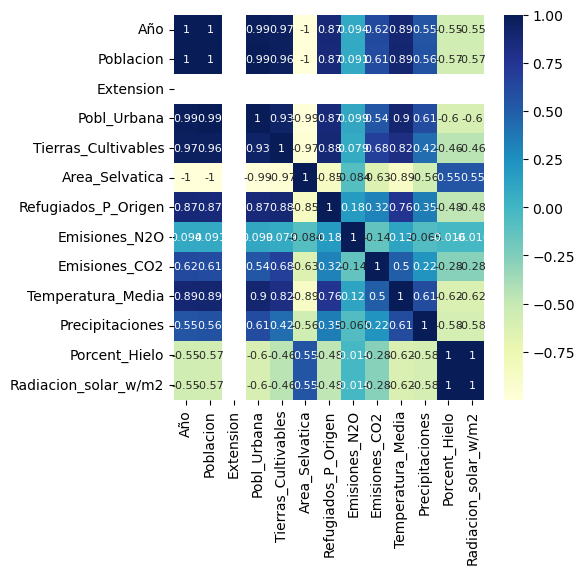

In [11]:
plt.subplots(figsize=(5,5))
sns.heatmap(tabla_reducida.corr(numeric_only = True),cmap = 'YlGnBu',annot = True, annot_kws = {"size": 8});

In [12]:
# Aplicamos test de Shapiro-Wilk para comprobar la normalidad de las variables:

from scipy.stats import shapiro

columnas_a_probar = [i for i in tabla_reducida.columns]

Probablemente_Gaussiana = []
Probablemente_NO_Gaussiana = []

for i in columnas_a_probar:
    data = tabla_reducida[i]
    print(i)
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Probablemente sea Gaussiana')
        Probablemente_Gaussiana.append(i)
    else:
        print('Probablemente NO sea Gaussiana')
        Probablemente_NO_Gaussiana.append(i)


Año
stat=0.955, p=0.021
Probablemente NO sea Gaussiana
Poblacion
stat=0.946, p=0.008
Probablemente NO sea Gaussiana
Extension
stat=1.000, p=1.000
Probablemente sea Gaussiana
Pobl_Urbana
stat=0.933, p=0.002
Probablemente NO sea Gaussiana
Tierras_Cultivables
stat=0.898, p=0.000
Probablemente NO sea Gaussiana
Area_Selvatica
stat=0.945, p=0.007
Probablemente NO sea Gaussiana
Refugiados_P_Origen
stat=0.915, p=0.000
Probablemente NO sea Gaussiana
Emisiones_N2O
stat=0.842, p=0.000
Probablemente NO sea Gaussiana
Emisiones_CO2
stat=0.962, p=0.046
Probablemente NO sea Gaussiana
Temperatura_Media
stat=0.968, p=0.091
Probablemente sea Gaussiana
Precipitaciones
stat=0.988, p=0.797
Probablemente sea Gaussiana
Porcent_Hielo
stat=0.985, p=0.654
Probablemente sea Gaussiana
Radiacion_solar_w/m2
stat=0.985, p=0.654
Probablemente sea Gaussiana


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [13]:
print('Gaussiana: ', Probablemente_Gaussiana)
print('No Gaussiana: ', Probablemente_NO_Gaussiana)

Gaussiana:  ['Extension', 'Temperatura_Media', 'Precipitaciones', 'Porcent_Hielo', 'Radiacion_solar_w/m2']
No Gaussiana:  ['Año', 'Poblacion', 'Pobl_Urbana', 'Tierras_Cultivables', 'Area_Selvatica', 'Refugiados_P_Origen', 'Emisiones_N2O', 'Emisiones_CO2']


En estas condiciones, aplicaremos:  

- **RobustScaler:** Cuando las variables contienen outliers, sean Gaussianas o no. Escala las características utilizando estadísticas resistentes a los valores atípicos:  
- **MinMax:** Cuando son variables NO Gaussianas pero sin outliers.  
- **StandardScaler:** Cuando sigue una distribución Normal. Transforma de manera que tengan una media de 0 y una desviacion estándar de 1:

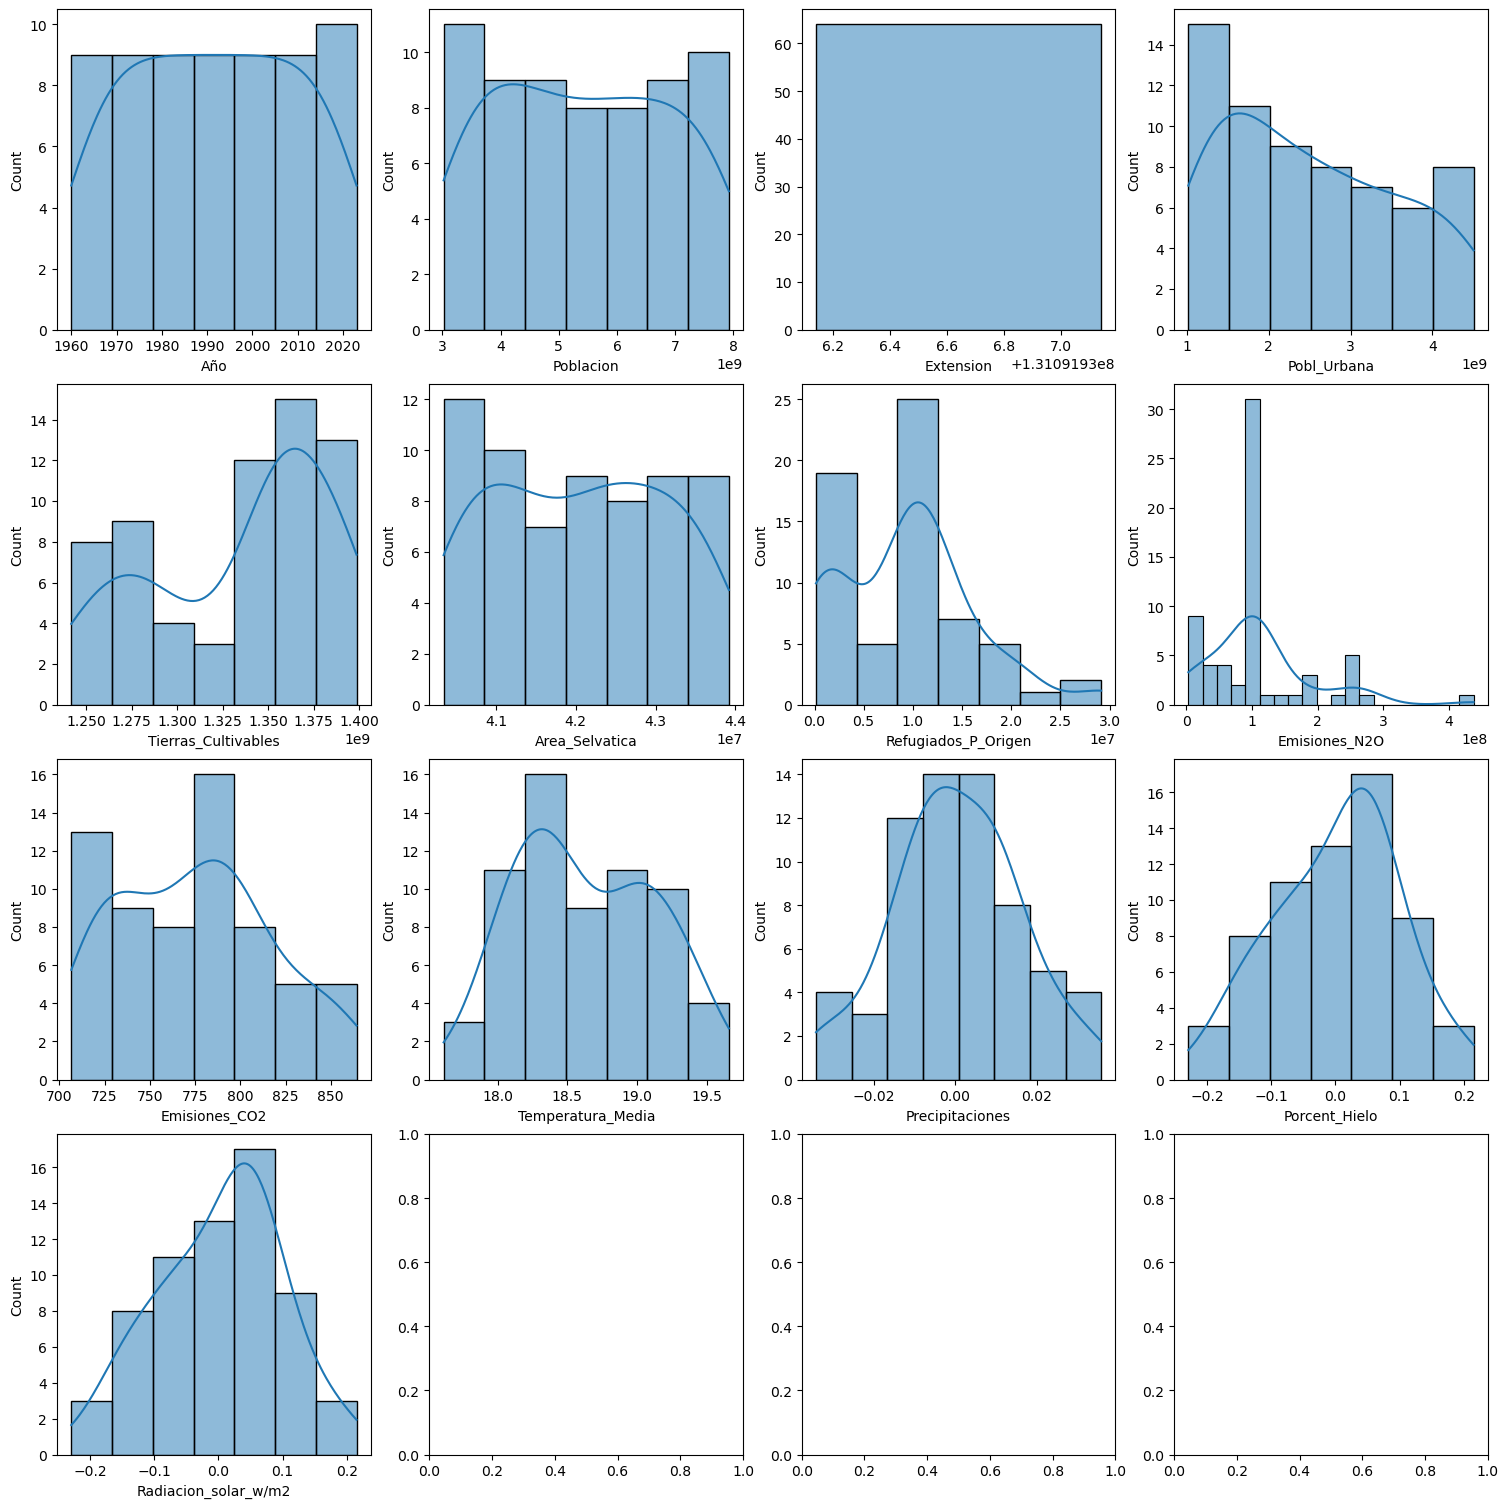

In [14]:
# Muestra gráfico de las variables

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
axs = axs.flatten()
for k,v in tabla_reducida[columnas_a_probar].items():
    sns.histplot(v, ax=axs[index], kde = True)
    index += 1
plt.tight_layout(pad=0.4)

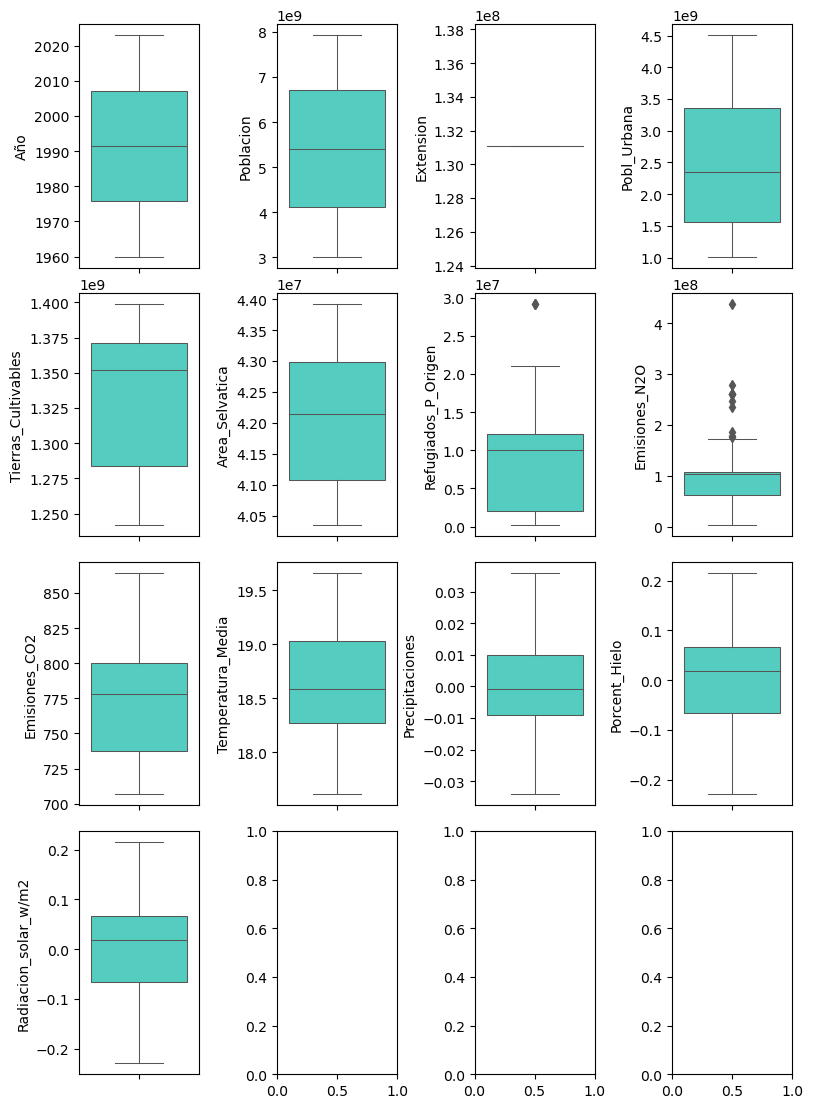

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Representar gráficamente las distintas variables para ver su distribución y outliers
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(8, 11))
index = 0
axs = axs.flatten()

for k, v in tabla_reducida[columnas_a_probar].items():
    sns.boxplot(y=k, data=tabla_reducida, ax=axs[index], color='turquoise', linewidth= 0.75)
    index += 1

plt.style.use('ggplot')

plt.tight_layout(pad=0.4)
plt.show()


In [16]:
print('Gaussiana: ', Probablemente_Gaussiana)
print('No Gaussiana: ', Probablemente_NO_Gaussiana)

Gaussiana:  ['Extension', 'Temperatura_Media', 'Precipitaciones', 'Porcent_Hielo', 'Radiacion_solar_w/m2']
No Gaussiana:  ['Año', 'Poblacion', 'Pobl_Urbana', 'Tierras_Cultivables', 'Area_Selvatica', 'Refugiados_P_Origen', 'Emisiones_N2O', 'Emisiones_CO2']


En estas condiciones, aplicaremos:  

- **RobustScaler:** Cuando las variables contienen outliers, sean Gaussianas o no. Escala las características utilizando estadísticas resistentes a los valores atípicos:  
- **MinMax:** Cuando son variables NO Gaussianas pero sin outliers.  
- **StandardScaler:** Cuando sigue una distribución Normal. Transforma de manera que tengan una media de 0 y una desviacion estándar de 1:

In [17]:
# Hacemos una copia del dataframe para proceder al escalado de las variables.
tabla_proces = tabla_reducida.copy()

In [18]:
# Aplicamos StandardScaler:

Estandar = ['Extension', 'Precipitaciones', 'Porcent_Hielo','Radiacion_solar_w/m2']
scaler = preprocessing.StandardScaler().fit(tabla_reducida[Estandar])
tabla_proces[Estandar] = scaler.transform(tabla_reducida[Estandar])

In [19]:
# Aplicamos RobustScaler:

Robust = ['Refugiados_P_Origen', 'Emisiones_N2O']
scaler2 = preprocessing.RobustScaler().fit(tabla_reducida[Robust])
tabla_proces[Robust] = scaler2.transform(tabla_reducida[Robust])

In [20]:
# aplicamos MinMax:

Min_Max = ['Poblacion', 'Pobl_Urbana', 'Tierras_Cultivables', 'Area_Selvatica', 'Emisiones_CO2']
scaler3 = preprocessing.MinMaxScaler().fit(tabla_reducida[Min_Max])
tabla_proces[Min_Max] = scaler3.transform(tabla_reducida[Min_Max])

In [21]:
tabla_proces.head()

,Año,Poblacion,Extension,Pobl_Urbana,Tierras_Cultivables,Area_Selvatica,Refugiados_P_Origen,Emisiones_N2O,Emisiones_CO2,Temperatura_Media,Precipitaciones,Porcent_Hielo,Radiacion_solar_w/m2
0,1960,0.00,0.00,0.00,0.00,1.00,-0.98,-0.05,0.00,18.08,0.73,0.47,0.47
1,1961,0.01,0.00,0.01,0.00,0.98,-0.97,-0.05,0.02,18.22,0.56,-0.92,-0.92
2,1962,0.02,0.00,0.02,0.01,0.97,-0.96,-0.04,0.03,18.31,-0.41,-1.20,-1.20
3,1963,0.03,0.00,0.03,0.05,0.95,-0.96,-0.04,0.05,18.36,1.21,-0.25,-0.25
4,1964,0.05,0.00,0.04,0.07,0.93,-0.83,-0.03,0.07,17.99,-0.63,0.49,0.49


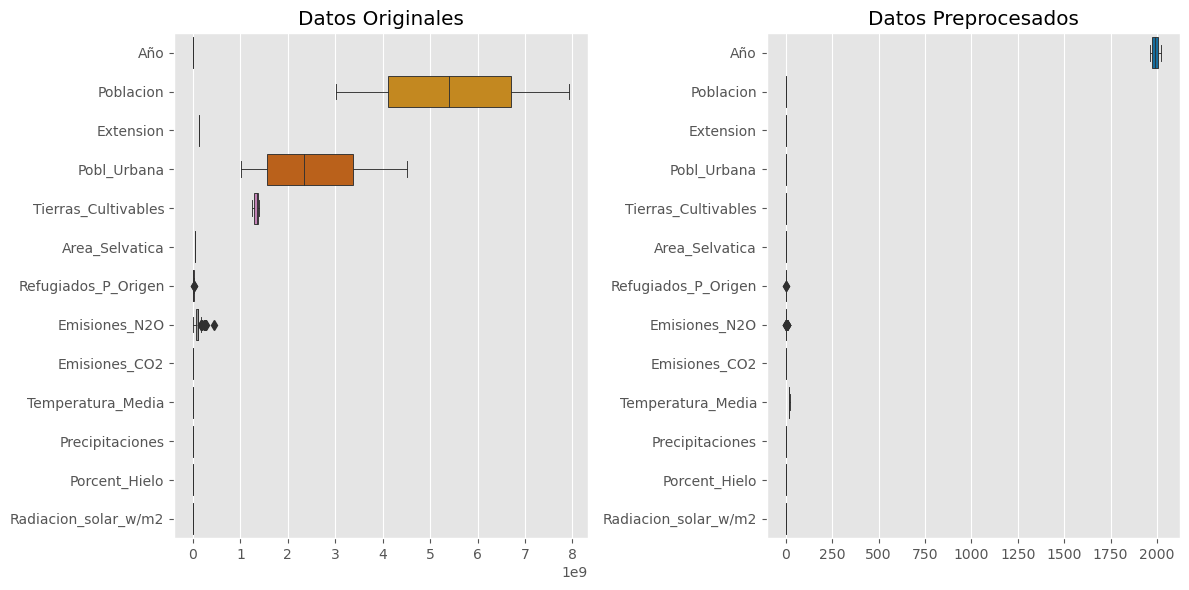

In [22]:
# Comparación datos originales / datos preprocesados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Dataset original
sns.boxplot(data=tabla_reducida, ax=axes[0], palette='colorblind', orient = 'h',linewidth= 0.65)
axes[0].set_title('Datos Originales')

# Dataset Preprocesado
sns.boxplot(data=tabla_proces, ax=axes[1], palette='colorblind', orient = 'h', linewidth= 0.65)
axes[1].set_title('Datos Preprocesados')

plt.style.use('ggplot')

plt.tight_layout()
plt.show()

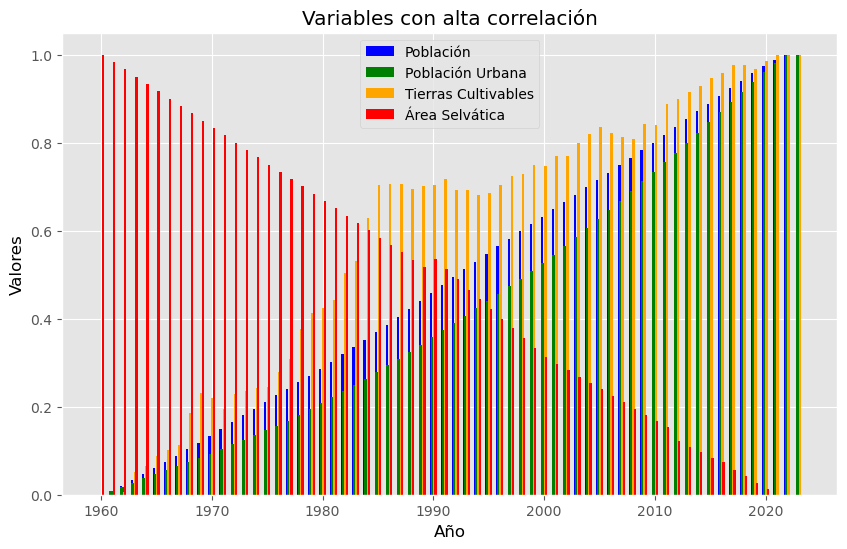

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el DataFrame
tabla = pd.DataFrame({
    'Año': tabla_proces['Año'],
    'Poblacion': tabla_proces['Poblacion'],
    'Pobl_Urbana': tabla_proces['Pobl_Urbana'],
    'Tierras_Cultivables': tabla_proces['Tierras_Cultivables'],
    'Area_Selvatica': tabla_proces['Area_Selvatica']
})

# Crear un gráfico de barras para las cuatro variables en el mismo gráfico
plt.figure(figsize=(10, 6))
plt.bar(tabla['Año'] - 0.2, tabla_proces['Poblacion'], width=0.20, color='blue', label='Población')
plt.bar(tabla['Año'] - 0.1, tabla_proces['Pobl_Urbana'], width=0.30, color='green', label='Población Urbana')
plt.bar(tabla['Año'] + 0.1, tabla_proces['Tierras_Cultivables'], width=0.25, color='orange', label='Tierras Cultivables')
plt.bar(tabla['Año'] + 0.2, tabla_proces['Area_Selvatica'], width=0.20, color='red', label='Área Selvática')

plt.xlabel('Año', color = 'black')
plt.ylabel('Valores', color = 'black')
plt.title('Variables con alta correlación', color = 'black')
plt.legend()

# Mostrar el gráfico
plt.show()


### **Modelo Ridge para Temperatura_Media**

In [24]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X = tabla_proces[['Poblacion','Extension', 'Pobl_Urbana', 'Tierras_Cultivables', 'Area_Selvatica', 'Refugiados_P_Origen', 'Emisiones_N2O', 'Emisiones_CO2', 'Precipitaciones', 'Porcent_Hielo', 'Radiacion_solar_w/m2']]
y = tabla_proces[['Temperatura_Media']]

# Define el rango de valores de alpha que deseas probar
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 500.00, 1000.00, 1100.00]}

# Crea un modelo de regresión Ridge
ridge = Ridge()

# Crea un objeto GridSearchCV para realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(ridge, param_grid, cv=7)  # cv=5: validación cruzada de 5 divisiones

# Ajusta el modelo en los datos
grid_search.fit(X, y)

# Busca el mejor valor de alpha
best_alpha = grid_search.best_params_['alpha']

# El mejor modelo con el mejor alpha ya ha sido ajustado automáticamente
# Se accede al mejor modelo con: grid_search.best_estimator_

# hace predicciones en datos de prueba
y_pred = grid_search.predict(X)

# Calcular la precisión para cada salida y la media de todas las salidas.
# precision_train = modelo_multioutput_Ridge.score(X2_train, y2_train)
# precision_test = modelo_multioutput_Ridge.score(X2_test, y2_test)

precision_global = r2_score(y, y_pred)

# Imprime la precisión

print('La precisión global del modelo con Ridge es: {:.2f}%'.format(precision_global * 100))
print(grid_search.best_estimator_)

La precisión global del modelo con Ridge es: 81.86%
Ridge()


In [25]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = y.columns.copy()
y_pred

,Temperatura_Media
0,18.10
1,18.19
2,18.14
3,18.23
4,18.05
5,17.94
6,18.03
7,18.11
8,18.12
9,18.11


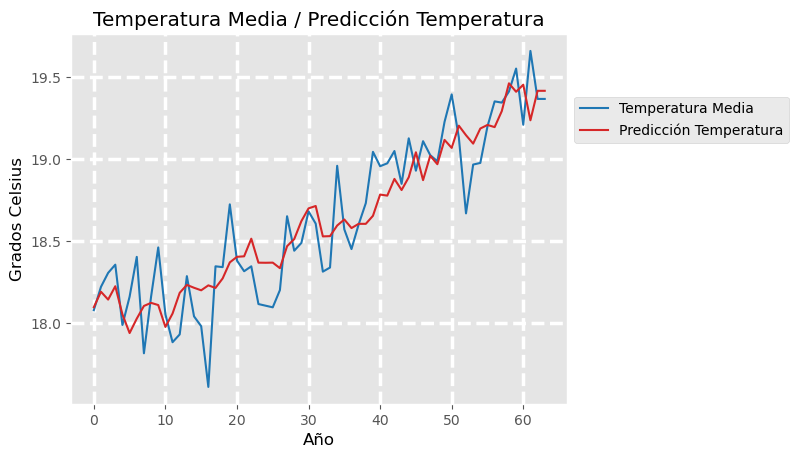

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax1 = plt.subplots()
color2 = 'black'
# Configurar el eje X (año)
ax1.set_xlabel('Año', color=color2)

# Configurar el primer eje (escala izquierda) para "Temperatura_Media"
color1 = 'tab:blue'
color2 = 'black'
ax1.set_ylabel('Grados Celsius', color=color2)
ax1.plot(tabla_proces.index, tabla_proces['Temperatura_Media'], color=color1)

# Configurar el segundo eje (escala izquierda) para "Predicción Temperatura"
color3 = 'tab:red'
ax1.plot(y_pred.index, y_pred, color=color3)

# Agregar título y leyendas
plt.title('Temperatura Media / Predicción Temperatura')
ax1.legend(['Temperatura Media', 'Predicción Temperatura'], loc='upper left', bbox_to_anchor=(1, 0.85))

plt.style.use('fivethirtyeight')
ax1.grid(color='white', linestyle='--', linewidth= 2.5)

# Mostrar el gráfico
plt.show()



In [27]:
# Datos prevision Población Mundial ONU.

pob_onu = pd.read_csv('previson_poblacion_mundial.csv')
poblacion_onu = pd.DataFrame(pob_onu)

poblacion_onu['Año'] = poblacion_onu['2023']
poblacion_onu['Poblacion'] = poblacion_onu['8045311']
poblacion_onu = poblacion_onu.drop(['2023', '8045311'], axis=1)
poblacion_onu['Poblacion'] = (poblacion_onu['Poblacion'] * 1000).copy()

poblacion_onu.head()

,Año,Poblacion
0,2024,8118836000
1,2025,8191988000
2,2026,8264365000
3,2027,8335978000
4,2028,8406829000


In [28]:
# Datos futuros de Año / Variables 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


# Datos históricos de población
hist_poblacion = tabla_reducida[['Año', 'Poblacion']]
hist_pob_urb = tabla_reducida[['Año', 'Pobl_Urbana']]
hist_t_cultiv = tabla_reducida[['Año', 'Tierras_Cultivables']]
hist_a_selv = tabla_reducida[['Año', 'Area_Selvatica']]
hist_ref_orig = tabla_reducida[['Año', 'Refugiados_P_Origen']]
hist_N2O = tabla_reducida[['Año', 'Emisiones_N2O']]
hist_CO2 = tabla_reducida[['Año', 'Emisiones_CO2']]
hist_precip = tabla_reducida[['Año', 'Precipitaciones']]
hist_hielo = tabla_reducida[['Año', 'Porcent_Hielo']]
hist_rad_sol = tabla_reducida[['Año', 'Radiacion_solar_w/m2']]

hist_extension = tabla_reducida[['Año', 'Extension']]
hist_temp_media = tabla_reducida[['Año', 'Temperatura_Media']]

# Modelo Ridge de regresión lineal

alpha = 1.0  # Ajustable

model_fut_pob = Ridge(alpha=alpha)
model_fut_pob_urb = Ridge(alpha=alpha)
model_fut_t_cultiv = Ridge(alpha=alpha)
model_fut_a_selv = Ridge(alpha=alpha)
model_fut_ref_orig = Ridge(alpha=alpha)
model_fut_N2O = Ridge(alpha=alpha)
model_fut_CO2 = Ridge(alpha=alpha)
model_fut_precip = Ridge(alpha=alpha)
model_fut_hielo = Ridge(alpha=alpha)
model_fut_rad_sol = Ridge(alpha=alpha)

model_fut_ext = Ridge(alpha = alpha)
model_fut_temp_media = Ridge(alpha = alpha)

# Ajusta el modelo a los datos históricos


A = hist_poblacion[['Año']]

b = hist_poblacion['Poblacion']
model_fut_pob.fit(A, b)

c = hist_pob_urb['Pobl_Urbana']
model_fut_pob_urb.fit(A, c)

d = hist_t_cultiv['Tierras_Cultivables']
model_fut_t_cultiv.fit(A, d)

e = hist_a_selv['Area_Selvatica']
model_fut_a_selv.fit(A, e)

f = hist_ref_orig['Refugiados_P_Origen']
model_fut_ref_orig.fit(A, f)

g = hist_N2O['Emisiones_N2O']
model_fut_N2O.fit(A, g)

h = hist_CO2['Emisiones_CO2']
model_fut_CO2.fit(A, h)

i = hist_precip['Precipitaciones']
model_fut_precip.fit(A, i)

j = hist_hielo['Porcent_Hielo']
model_fut_hielo.fit(A, j)

k = hist_rad_sol['Radiacion_solar_w/m2']
model_fut_rad_sol.fit(A, k)


bex = hist_extension['Extension']
model_fut_ext.fit(A, bex)

l = hist_temp_media['Temperatura_Media']
model_fut_temp_media.fit(A, l)


# Proyecta la población futura 
fut_años = np.arange(2024, 2051).astype(int)

fut_poblacion = model_fut_pob.predict(fut_años.reshape(-1, 1))
fut_pob_urb = model_fut_pob_urb.predict(fut_años.reshape(-1, 1))
fut_t_cultiv = model_fut_t_cultiv.predict(fut_años.reshape(-1, 1))
fut_a_selv = model_fut_a_selv.predict(fut_años.reshape(-1, 1))
fut_ref_orig = model_fut_ref_orig.predict(fut_años.reshape(-1, 1))
fut_N2O = model_fut_N2O.predict(fut_años.reshape(-1, 1))
fut_CO2 = model_fut_CO2.predict(fut_años.reshape(-1, 1))
fut_precip = model_fut_precip.predict(fut_años.reshape(-1, 1))
fut_hielo = model_fut_hielo.predict(fut_años.reshape(-1, 1))
fut_rad_sol = model_fut_rad_sol.predict(fut_años.reshape(-1, 1))

fut_ext = model_fut_ext.predict(fut_años.reshape(-1,1))
fut_temp_media = model_fut_temp_media.predict(fut_años.reshape(-1, 1))

# Crea un DataFrame para los datos proyectados
datos_proyectados = pd.DataFrame({
    'Año': fut_años,
    'Poblacion': poblacion_onu['Poblacion'],
    'Extension': fut_ext,
    'Pobl_Urbana': fut_pob_urb,
    'Tierras_Cultivables': fut_t_cultiv,
    'Area_Selvatica': fut_a_selv,
    'Refugiados_P_Origen': fut_ref_orig,
    'Emisiones_N2O': fut_N2O,
    'Emisiones_CO2': fut_CO2,
    'Temperatura_Media': fut_temp_media,
    'Precipitaciones': fut_precip,
    'Porcent_Hielo': fut_hielo,
    'Radiacion_solar_w/m2': fut_rad_sol
})

datos_proyectados

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with featu

,Año,Poblacion,Extension,Pobl_Urbana,Tierras_Cultivables,Area_Selvatica,Refugiados_P_Origen,Emisiones_N2O,Emisiones_CO2,Temperatura_Media,Precipitaciones,Porcent_Hielo,Radiacion_solar_w/m2
0,2024,8118836000,131091936.64,4358361535.95,1418118842.26,40121070.78,19709067.83,123672195.46,821.43,19.40,0.02,-0.09,-0.09
1,2025,8191988000,131091936.64,4415332528.31,1420679172.86,40061798.42,20028340.30,124077897.53,822.85,19.42,0.02,-0.09,-0.09
2,2026,8264365000,131091936.64,4472303520.68,1423239503.45,40002526.06,20347612.76,124483599.61,824.27,19.45,0.02,-0.10,-0.10
3,2027,8335978000,131091936.64,4529274513.04,1425799834.05,39943253.70,20666885.22,124889301.69,825.70,19.47,0.02,-0.10,-0.10
4,2028,8406829000,131091936.64,4586245505.41,1428360164.64,39883981.34,20986157.69,125295003.76,827.12,19.49,0.02,-0.10,-0.10
5,2029,8476889000,131091936.64,4643216497.78,1430920495.24,39824708.98,21305430.15,125700705.84,828.54,19.52,0.02,-0.11,-0.11
6,2030,8546141000,131091936.64,4700187490.14,1433480825.83,39765436.62,21624702.61,126106407.92,829.96,19.54,0.02,-0.11,-0.11
7,2031,8614533000,131091936.64,4757158482.51,1436041156.43,39706164.26,21943975.08,126512109.99,831.38,19.57,0.02,-0.11,-0.11
8,2032,8682092000,131091936.64,4814129474.87,1438601487.02,39646891.90,22263247.54,126917812.07,832.80,19.59,0.02,-0.11,-0.11
9,2033,8748799000,131091936.64,4871100467.24,1441161817.62,39587619.54,22582520.00,127323514.15,834.22,19.61,0.02,-0.12,-0.12


In [29]:
# Aplicamos test de Shapiro-Wilk para comprobar la normalidad de los datos_proyectados:

from scipy.stats import shapiro

columnas_a_probar = [i for i in datos_proyectados.columns]

Probablemente_Gaussiana2 = []
Probablemente_NO_Gaussiana2 = []

for i in columnas_a_probar:
    data = datos_proyectados[i]
    print(i)
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Probablemente sea Gaussiana')
        Probablemente_Gaussiana2.append(i)
    else:
        print('Probablemente NO sea Gaussiana')
        Probablemente_NO_Gaussiana2.append(i)

Año
stat=0.958, p=0.334
Probablemente sea Gaussiana
Poblacion
stat=0.953, p=0.247
Probablemente sea Gaussiana
Extension
stat=1.000, p=1.000
Probablemente sea Gaussiana
Pobl_Urbana
stat=0.958, p=0.334
Probablemente sea Gaussiana
Tierras_Cultivables
stat=0.958, p=0.334
Probablemente sea Gaussiana
Area_Selvatica
stat=0.958, p=0.334
Probablemente sea Gaussiana
Refugiados_P_Origen
stat=0.958, p=0.334
Probablemente sea Gaussiana
Emisiones_N2O
stat=0.958, p=0.334
Probablemente sea Gaussiana
Emisiones_CO2
stat=0.958, p=0.334
Probablemente sea Gaussiana
Temperatura_Media
stat=0.958, p=0.334
Probablemente sea Gaussiana
Precipitaciones
stat=0.958, p=0.334
Probablemente sea Gaussiana
Porcent_Hielo
stat=0.958, p=0.334
Probablemente sea Gaussiana
Radiacion_solar_w/m2
stat=0.958, p=0.334
Probablemente sea Gaussiana


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


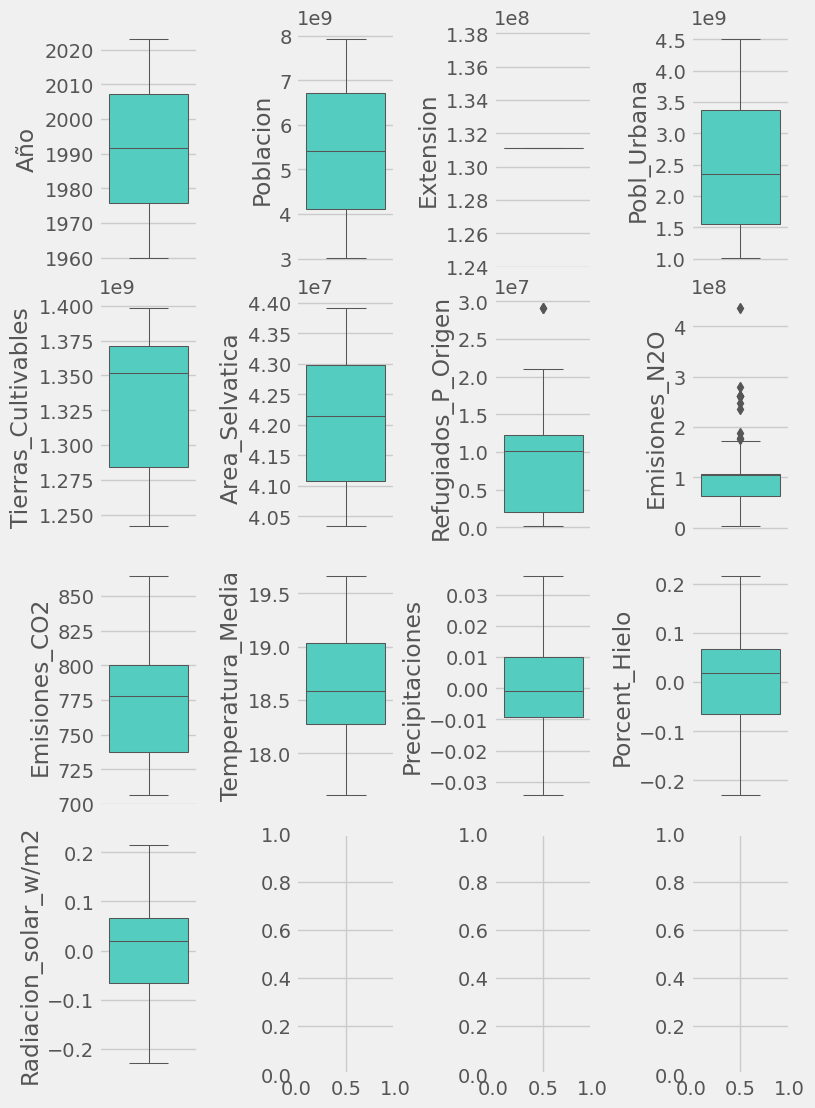

In [30]:
# Representamos gráficamente los datos_proyectados para ver su distribución, presencia / ausencia de outliers..

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(8, 11))
index = 0
axs = axs.flatten()
for k,v in datos_proyectados[columnas_a_probar].items():

    sns.boxplot(y=k, data=tabla_reducida, ax=axs[index], color='turquoise', linewidth= 0.75)
    index += 1

plt.style.use('ggplot')

plt.tight_layout(pad=0.4)
plt.show()


In [31]:
# Hacemos una copia del dataframe para proceder al escalado de las variables Proyectadas.
datos_proyectados_proces = datos_proyectados.copy()

# Aplicamos StandardScaler:

Estandar_proy = ['Extension', 'Precipitaciones', 'Porcent_Hielo','Radiacion_solar_w/m2']
scaler_proy = preprocessing.StandardScaler().fit(datos_proyectados[Estandar_proy])
datos_proyectados_proces[Estandar_proy] = scaler_proy.transform(datos_proyectados[Estandar_proy])

# Aplicamos RobustScaler:

Robust_proy = ['Refugiados_P_Origen', 'Emisiones_N2O']
scaler_proy2 = preprocessing.RobustScaler().fit(datos_proyectados[Robust_proy])
datos_proyectados_proces[Robust_proy] = scaler_proy2.transform(datos_proyectados[Robust_proy])

# aplicamos MinMax:

Min_Max_proy = ['Poblacion', 'Pobl_Urbana', 'Tierras_Cultivables', 'Area_Selvatica', 'Emisiones_CO2']
scaler_proy3 = preprocessing.MinMaxScaler().fit(datos_proyectados[Min_Max_proy])
datos_proyectados_proces[Min_Max_proy] = scaler_proy3.transform(datos_proyectados[Min_Max_proy])

datos_proyectados_proces.head()

,Año,Poblacion,Extension,Pobl_Urbana,Tierras_Cultivables,Area_Selvatica,Refugiados_P_Origen,Emisiones_N2O,Emisiones_CO2,Temperatura_Media,Precipitaciones,Porcent_Hielo,Radiacion_solar_w/m2
0,2024,0.00,0.00,0.00,0.00,1.00,-1.00,-1.00,0.00,19.40,-1.67,1.67,1.67
1,2025,0.05,0.00,0.04,0.04,0.96,-0.92,-0.92,0.04,19.42,-1.54,1.54,1.54
2,2026,0.09,0.00,0.08,0.08,0.92,-0.85,-0.85,0.08,19.45,-1.41,1.41,1.41
3,2027,0.14,0.00,0.12,0.12,0.88,-0.77,-0.77,0.12,19.47,-1.28,1.28,1.28
4,2028,0.18,0.00,0.15,0.15,0.85,-0.69,-0.69,0.15,19.49,-1.16,1.16,1.16


### **Aplicamos Modelo Ridge de Temperatura_Media a los datos futuros**

In [32]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X2 = datos_proyectados_proces[['Poblacion','Extension', 'Pobl_Urbana', 'Tierras_Cultivables', 'Refugiados_P_Origen', 'Emisiones_N2O', 'Emisiones_CO2', 'Temperatura_Media', 'Precipitaciones', 'Porcent_Hielo', 'Radiacion_solar_w/m2']]

y_pred_fut = grid_search.predict(X2)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Temperatura_Media
Feature names seen at fit time, yet now missing:
- Area_Selvatica

  warnings.warn(message, FutureWarning)


In [33]:
temperatura_proyectada1 = pd.DataFrame()
temperatura_proyectada1['Año'] = tabla_reducida['Año']
temperatura_proyectada1['Temperatura_Media'] = tabla_reducida['Temperatura_Media']

temperatura_proyectada2 = pd.DataFrame()
temperatura_proyectada2['Año'] = datos_proyectados['Año']
temperatura_proyectada2['Temperatura_Media'] = y_pred_fut

temperatura_proyectada = pd.concat([temperatura_proyectada1, temperatura_proyectada2])

temperatura_proyectada.head()

,Año,Temperatura_Media
0,1960,18.08
1,1961,18.22
2,1962,18.31
3,1963,18.36
4,1964,17.99


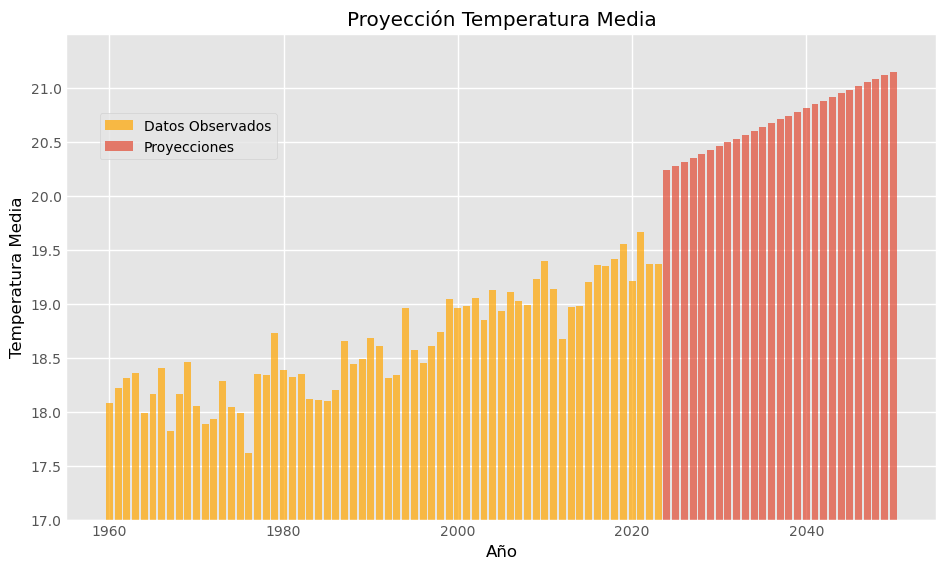

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Datos observados
datos_observados = temperatura_proyectada1
# Proyecciones
proyecciones = temperatura_proyectada2

# Calcula el rango centrado en los valores de ambas series de datos
min_valor = min(datos_observados['Temperatura_Media'].min(), proyecciones['Temperatura_Media'].min())
max_valor = max(datos_observados['Temperatura_Media'].max(), proyecciones['Temperatura_Media'].max())
rango = max_valor - min_valor
margen = rango * 0.1  # Ajusta el margen como un porcentaje del rango
rango_min = min_valor - margen
rango_max = max_valor + margen

# Crea un gráfico de barras para los datos observados
plt.bar(datos_observados['Año'], datos_observados['Temperatura_Media'], label='Datos Observados', alpha=0.7, color = 'orange')

# Crea un gráfico de barras para las proyecciones
plt.bar(proyecciones['Año'], proyecciones['Temperatura_Media'], label='Proyecciones', alpha=0.7)

plt.xlabel('Año', color = 'black')
plt.ylabel('Temperatura Media', color = 'black')
plt.title('Proyección Temperatura Media', color = 'black')
plt.legend(bbox_to_anchor=(0.25, 0.85))  # Agregar una leyenda

# Configura el rango del eje Y
plt.ylim(17, rango_max)

plt.grid(True)
plt.show()


## Cambiamos los escenarios para ver la evolución de la temperatura

Tras probar con diferetes escenarios y no conseguir descensos perceptibles de la temperatura, obtenenmos los factores de conversion de cada uno de las variables por medio de un pequeñoi programa de manera que la combinación de todos produzca una tendencia a la baja.

In [35]:
# Copia los datos originales para no modificar los originales
proyecciones_modificadas = datos_proyectados.copy()


factores = {
    'Año': 1 ,
    'Poblacion': 1,
    'Extension': 1,
    'Pobl_Urbana': 1,
    'Tierras_Cultivables': 1,
    'Area_Selvatica': 1,
    'Refugiados_P_Origen': 1,
    'Emisiones_N2O': 1,
    'Emisiones_CO2': 1,
    'Precipitaciones': 1,
    'Porcent_Hielo': 1,
    'Radiacion_solar_w/m2': 1
}


# Define la función para calcular la temperatura promedio en todos los años
def calcular_temperatura_promedio(proyecciones, factores):
    # Aplicar los factores a las proyecciones
    for fila in range(1, len(proyecciones)):
        for columna, factor_corrector in factores.items():
            if factor_corrector != 1:
                proyecciones.loc[fila, columna] = proyecciones.loc[fila - 1, columna] * factor_corrector
    # Calcular la temperatura promedio en todos los años
    temperatura_promedio = proyecciones['Temperatura_Media'].mean()
    return temperatura_promedio

# Inicializa los factores con los valores actuales
factores_actuales = factores.copy()

# Define un factor de degradación para todas las variables excepto Temperatura_Media, Año y Extension
factor_degradacion = 0.99  # Valor menor que 1 para una tendencia a la baja

# Realiza un bucle para ajustar los factores y degradar todas las variables excepto Temperatura_Media, Año y Extension
for fila in range(1, len(proyecciones_modificadas)):
    for columna, factor_corrector in factores_actuales.items():
        if columna not in ['Temperatura_Media', 'Año', 'Extension']:
            factores_actuales[columna] *= factor_degradacion
    temperatura_actual = calcular_temperatura_promedio(proyecciones_modificadas, factores_actuales)

# Imprime los factores que degradan todas las variables excepto Temperatura_Media, Año y Extension
factores_ajustados = {columna: factor_corrector for columna, factor_corrector in factores_actuales.items() if columna not in ['Temperatura_Media', 'Año', 'Extension']}
print("Factores que degradan todas las variables excepto Temperatura_Media, Año y Extension:")
print(factores_ajustados)


Factores que degradan todas las variables excepto Temperatura_Media, Año y Extension:
{'Poblacion': 0.7700431458051551, 'Pobl_Urbana': 0.7700431458051551, 'Tierras_Cultivables': 0.7700431458051551, 'Area_Selvatica': 0.7700431458051551, 'Refugiados_P_Origen': 0.7700431458051551, 'Emisiones_N2O': 0.7700431458051551, 'Emisiones_CO2': 0.7700431458051551, 'Precipitaciones': 0.7700431458051551, 'Porcent_Hielo': 0.7700431458051551, 'Radiacion_solar_w/m2': 0.7700431458051551}


In [36]:
proyecciones_escenarios = datos_proyectados.copy()
proyecciones_escenarios = proyecciones_escenarios.reset_index(drop=True)

# Define los factores de cambio para cada variable
factores = {
    'Año': 1 ,
    'Poblacion': 0.95,
    'Extension': 1,
    'Pobl_Urbana': 0.7315409885148975,
    'Tierras_Cultivables': 0.7700431458051551,
    'Area_Selvatica': 0.8470474603856704,
    'Refugiados_P_Origen': 0.7700431458051551,
    'Emisiones_N2O': 0.7700431458051551,
    'Emisiones_CO2': 0.7700431458051551,
    'Precipitaciones': 0.7700431458051551,
    'Porcent_Hielo': 0.7700431458051551,
    'Radiacion_solar_w/m2': 0.7700431458051551
}


for fila in range(1, len(proyecciones_escenarios)):
    for columna, factor_corrector in factores.items():
        if factor_corrector == 1:
            proyecciones_escenarios.loc[fila, columna] = proyecciones_escenarios.loc[fila, columna]
        else:
            proyecciones_escenarios.loc[fila, columna] = proyecciones_escenarios.loc[fila - 1, columna] * factor_corrector

proyecciones_escenarios

,Año,Poblacion,Extension,Pobl_Urbana,Tierras_Cultivables,Area_Selvatica,Refugiados_P_Origen,Emisiones_N2O,Emisiones_CO2,Temperatura_Media,Precipitaciones,Porcent_Hielo,Radiacion_solar_w/m2
0,2024,8118836000.00,131091936.64,4358361535.95,1418118842.26,40121070.78,19709067.83,123672195.46,821.43,19.40,0.02,-0.09,-0.09
1,2025,7712894200.00,131091936.64,3188320106.31,1092012694.42,33984451.12,15176832.60,95232926.44,632.54,19.42,0.01,-0.07,-0.07
2,2026,7327249490.00,131091936.64,2332386842.27,840896890.47,28786443.01,11686815.92,73333462.26,487.08,19.45,0.01,-0.05,-0.05
3,2027,6960887015.50,131091936.64,1706236576.20,647526886.84,24383483.45,8999352.49,56469929.97,375.08,19.47,0.01,-0.04,-0.04
4,2028,6612842664.72,131091936.64,1248181991.59,498623640.93,20653967.73,6929889.70,43484282.52,288.82,19.49,0.01,-0.03,-0.03
5,2029,6282200531.49,131091936.64,913096287.97,383961717.04,17494890.91,5336314.07,33484773.70,222.41,19.52,0.00,-0.02,-0.02
6,2030,5968090504.91,131091936.64,667967361.11,295667088.46,14819002.92,4109192.07,25784720.48,171.26,19.54,0.00,-0.02,-0.02
7,2031,5669685979.67,131091936.64,488645503.65,227676414.91,12552398.79,3164255.19,19855347.27,131.88,19.57,0.00,-0.01,-0.01
8,2032,5386201680.69,131091936.64,357464214.77,175320662.76,10632477.51,2436613.02,15289474.07,101.55,19.59,0.00,-0.01,-0.01
9,2033,5116891596.65,131091936.64,261499725.03,135004474.68,9006213.07,1876297.16,11773554.71,78.20,19.61,0.00,-0.01,-0.01


In [37]:
# Aplicamos test de Shapiro-Wilk para comprobar la normalidad de las proyecciones_escenarios:

from scipy.stats import shapiro

columnas_a_probar2 = [i for i in proyecciones_escenarios.columns]

Probablemente_Gaussiana3 = []
Probablemente_NO_Gaussiana3 = []

for i in columnas_a_probar2:
    data = proyecciones_escenarios[i]
    print(i)
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Probablemente sea Gaussiana')
        Probablemente_Gaussiana3.append(i)
    else:
        print('Probablemente NO sea Gaussiana')
        Probablemente_NO_Gaussiana3.append(i)


Año
stat=0.958, p=0.334
Probablemente sea Gaussiana
Poblacion
stat=0.936, p=0.097
Probablemente sea Gaussiana
Extension
stat=1.000, p=1.000
Probablemente sea Gaussiana
Pobl_Urbana
stat=0.621, p=0.000
Probablemente NO sea Gaussiana
Tierras_Cultivables
stat=0.673, p=0.000
Probablemente NO sea Gaussiana
Area_Selvatica
stat=0.793, p=0.000
Probablemente NO sea Gaussiana
Refugiados_P_Origen
stat=0.673, p=0.000
Probablemente NO sea Gaussiana
Emisiones_N2O
stat=0.673, p=0.000
Probablemente NO sea Gaussiana
Emisiones_CO2
stat=0.673, p=0.000
Probablemente NO sea Gaussiana
Temperatura_Media
stat=0.958, p=0.334
Probablemente sea Gaussiana
Precipitaciones
stat=0.673, p=0.000
Probablemente NO sea Gaussiana
Porcent_Hielo
stat=0.673, p=0.000
Probablemente NO sea Gaussiana
Radiacion_solar_w/m2
stat=0.673, p=0.000
Probablemente NO sea Gaussiana


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


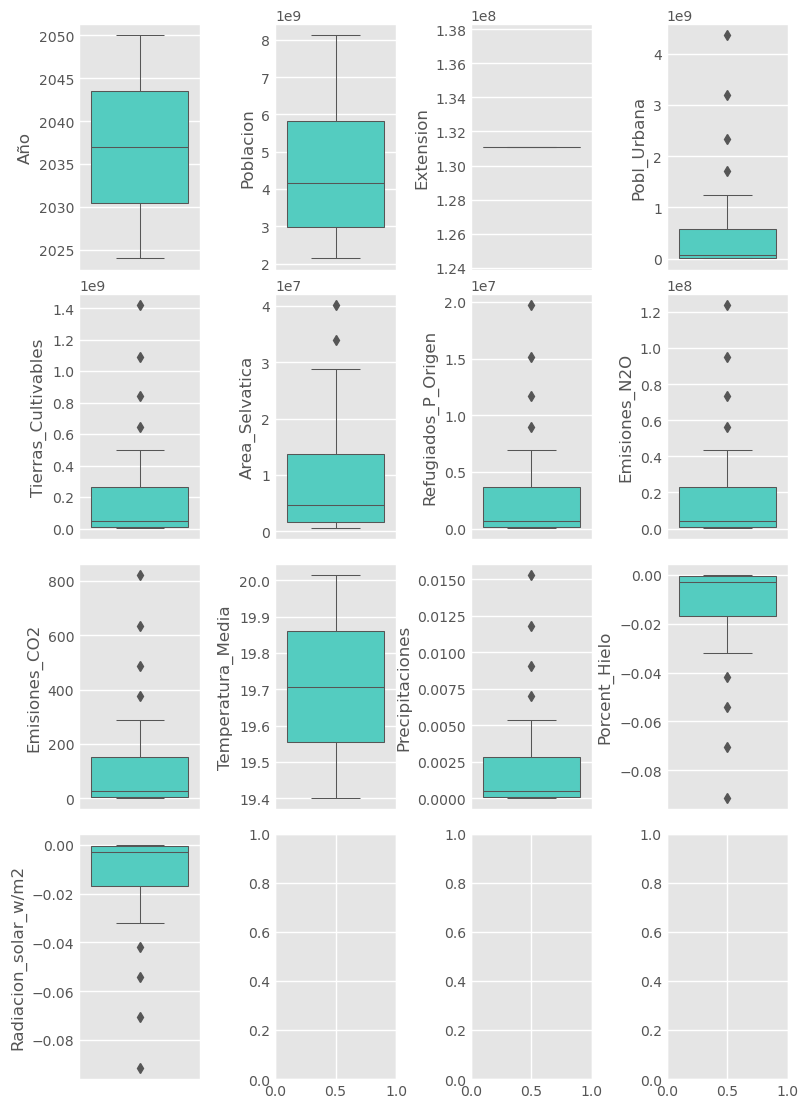

In [38]:
# Representamos gráficamente los proyecciones_escenarios para ver su distribución, presencia / ausencia de outliers..

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(8, 11))
index = 0
axs = axs.flatten()
for k,v in proyecciones_escenarios[columnas_a_probar].items():

#for k,v in df.items():
    sns.boxplot(y=k, data=proyecciones_escenarios, ax=axs[index], color = 'turquoise', linewidth= 0.75)
    index += 1

plt.style.use('ggplot')

plt.tight_layout(pad=0.4)
plt.show()


In [39]:
# Hacemos una copia del dataframe para proceder al escalado de las variables de proyecciones_escenarios

proyecciones_escenarios_proces = proyecciones_escenarios.copy()

# Aplicamos StandardScaler

Estandar_esc = ['Extension', 'Precipitaciones', 'Porcent_Hielo','Radiacion_solar_w/m2']
scaler_esc = preprocessing.StandardScaler().fit(proyecciones_escenarios[Estandar_esc])
proyecciones_escenarios_proces[Estandar_esc] = scaler_esc.transform(proyecciones_escenarios[Estandar_esc])

# Aplicamos RobustScaler
Robust_esc = ['Refugiados_P_Origen', 'Emisiones_N2O']
scaler_esc2 = preprocessing.RobustScaler().fit(proyecciones_escenarios[Robust_esc])
proyecciones_escenarios_proces[Robust_esc] = scaler_esc2.transform(proyecciones_escenarios[Robust_esc])

# Aplicamos MinMaxScaler
Min_Max_esc = ['Poblacion', 'Pobl_Urbana', 'Tierras_Cultivables', 'Area_Selvatica', 'Emisiones_CO2']
scaler_esc3 = preprocessing.MinMaxScaler().fit(proyecciones_escenarios[Min_Max_esc])
proyecciones_escenarios_proces[Min_Max_esc] = scaler_esc3.transform(proyecciones_escenarios[Min_Max_esc])

proyecciones_escenarios_proces.head()

,Año,Poblacion,Extension,Pobl_Urbana,Tierras_Cultivables,Area_Selvatica,Refugiados_P_Origen,Emisiones_N2O,Emisiones_CO2,Temperatura_Media,Precipitaciones,Porcent_Hielo,Radiacion_solar_w/m2
0,2024,1.00,0.00,1.00,1.00,1.00,5.42,5.42,1.00,19.40,3.29,-3.29,-3.29
1,2025,0.93,0.00,0.73,0.77,0.84,4.13,4.13,0.77,19.42,2.39,-2.39,-2.39
2,2026,0.87,0.00,0.54,0.59,0.71,3.14,3.14,0.59,19.45,1.69,-1.69,-1.69
3,2027,0.81,0.00,0.39,0.46,0.60,2.37,2.37,0.46,19.47,1.16,-1.16,-1.16
4,2028,0.75,0.00,0.29,0.35,0.51,1.78,1.78,0.35,19.49,0.75,-0.75,-0.75


### Predicciones temperatura con nuevos escenarios

In [40]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X3 = proyecciones_escenarios_proces[['Poblacion', 'Extension', 'Pobl_Urbana', 'Tierras_Cultivables', 'Area_Selvatica', 'Refugiados_P_Origen', 'Emisiones_N2O', 'Emisiones_CO2', 'Precipitaciones', 'Porcent_Hielo', 'Radiacion_solar_w/m2']]

y_pred_esc = grid_search.predict(X3)


In [41]:
y_pred_esc = pd.DataFrame(y_pred_esc)
y_pred_esc.columns = y.columns.copy()
y_pred_esc.head()

,Temperatura_Media
0,20.07
1,19.67
2,19.37
3,19.14
4,18.97


In [42]:
temperatura_escenario1= pd.DataFrame()
temperatura_escenario1['Año'] = tabla_reducida['Año']
temperatura_escenario1['Temperatura_Media'] = tabla_reducida['Temperatura_Media']

temperatura_escenario2 = pd.DataFrame()
temperatura_escenario2['Año'] = proyecciones_escenarios['Año']
temperatura_escenario2['Temperatura_Media'] = y_pred_esc

temperatura_escenario = pd.concat([temperatura_escenario1, temperatura_escenario2])

temperatura_escenario.head()

,Año,Temperatura_Media
0,1960,18.08
1,1961,18.22
2,1962,18.31
3,1963,18.36
4,1964,17.99


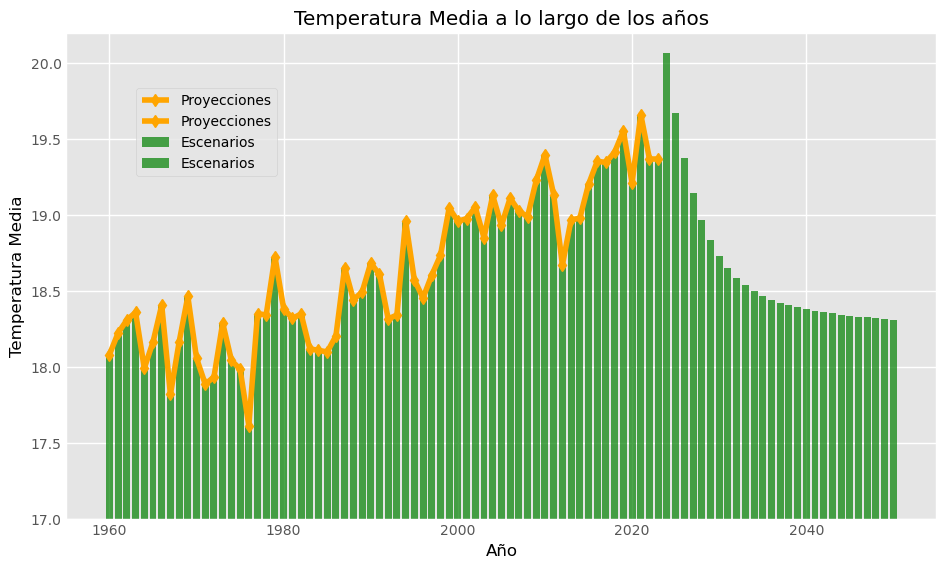

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Grafica los datos de temperatura_proyectada1
#plt.plot(temperatura_proyectada1['Año'], temperatura_proyectada1['Temperatura_Media'], label='Datos Observados', marker='o', linestyle='-')
#plt.plot(temperatura_escenario1['Año'], temperatura_escenario1['Temperatura_Media'], label='Datos Observados', marker='o', linestyle='-', color = 'orange')
plt.bar(temperatura_proyectada1['Año'], temperatura_proyectada1['Temperatura_Media'], label='Escenarios', alpha=0.7, color = 'green')
plt.plot(temperatura_proyectada1['Año'], temperatura_proyectada1['Temperatura_Media'], label='Proyecciones', marker='d', linestyle='-', color = 'orange')


# Graficar los datos de temperatura_proyectada2 (proyecciones)
plt.plot(temperatura_proyectada2['Año'], temperatura_proyectada2['Temperatura_Media'], label='Proyecciones', marker='d', linestyle='-', color = 'orange')
#plt.plot(temperatura_escenario2['Año'], temperatura_escenario2['Temperatura_Media'], label='Escenario', marker='o', linestyle='-', color = 'green')
plt.bar(temperatura_escenario2['Año'], temperatura_escenario2['Temperatura_Media'], label='Escenarios', alpha=0.7, color = 'green')

plt.xlabel('Año', color = 'black')
plt.ylabel('Temperatura Media', color = 'black')
plt.title('Temperatura Media a lo largo de los años', color = 'black')
plt.legend(bbox_to_anchor=(0.25, 0.90))

plt.ylim(17, 20.2)

plt.grid(True)
plt.show()


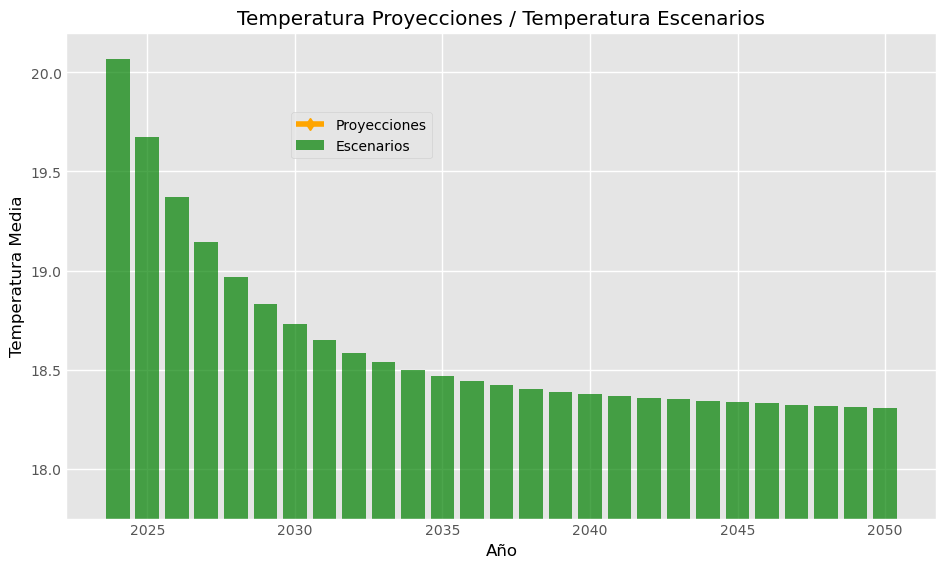

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar los datos de temperatura_proyectada2 (proyecciones)
plt.plot(temperatura_proyectada2['Año'], temperatura_proyectada2['Temperatura_Media'], label='Proyecciones', marker='d', linestyle='-',color = 'orange' )
plt.bar(temperatura_escenario2['Año'], temperatura_escenario2['Temperatura_Media'], label='Escenarios', alpha=0.7, color = 'green')

plt.xlabel('Año', color = 'black')
plt.ylabel('Temperatura Media', color = 'black')
plt.title('Temperatura Proyecciones / Temperatura Escenarios', color = 'black')
plt.legend(bbox_to_anchor=(0.25, 0.85))

plt.ylim(17.75, 20.2)

plt.grid(True)
plt.show()
